In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import itertools

In [30]:
data = pd.read_csv("matches.csv")    #use your own path for the data set
data.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


Check for null values

In [31]:
data.isnull().sum()

date               0
league_id          0
league             0
team1              0
team2              0
spi1               0
spi2               0
prob1              0
prob2              0
probtie            0
proj_score1        0
proj_score2        0
importance1    10622
importance2    10622
score1          6425
score2          6425
xg1            18070
xg2            18070
nsxg1          18070
nsxg2          18070
adj_score1     18070
adj_score2     18070
dtype: int64

Given that this is a large dataset we can drop the null values

In [32]:
data.dropna(inplace=True)
data.isnull().sum()

date           0
league_id      0
league         0
team1          0
team2          0
spi1           0
spi2           0
prob1          0
prob2          0
probtie        0
proj_score1    0
proj_score2    0
importance1    0
importance2    0
score1         0
score2         0
xg1            0
xg2            0
nsxg1          0
nsxg2          0
adj_score1     0
adj_score2     0
dtype: int64

In [33]:
def label5(string):
    return string[0:4]
data['year']=data['date'].apply(label5)

Now we begin exploratory data analysis on our data to sort of get an understanding of the number of matches played in each league and each year

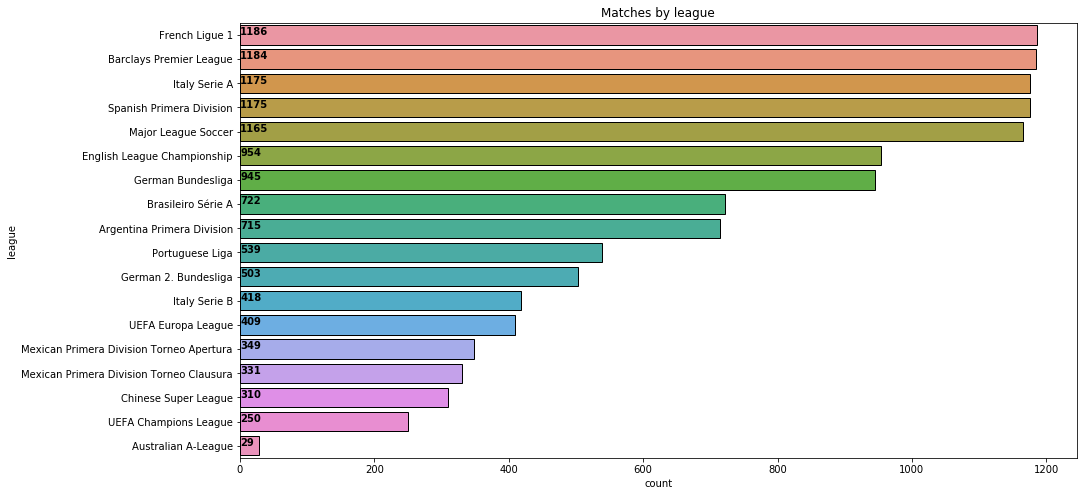

In [34]:
plt.figure(figsize=(15,8))
ax = sns.countplot(y = data["league"],
                   order=data["league"].value_counts().index,
                   linewidth = 1,
                   edgecolor = "k"*data["league"].nunique())
for i,j in enumerate(data["league"].value_counts().values):
    ax.text(.7,i,j,weight = "bold")
plt.title("Matches by league")
plt.show()

Now we calculate the matches played in each league by year

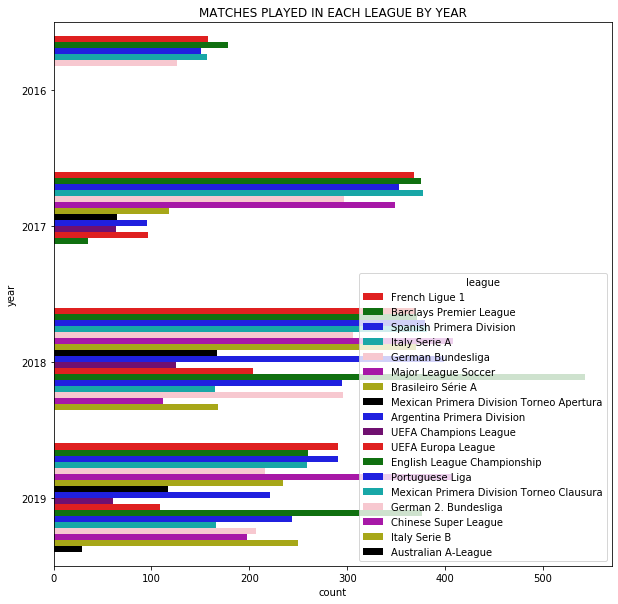

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(y = data["year"],hue=data["league"],
              palette=["r","g","b","c","pink","m","y","k","blue","purple"])
plt.title("MATCHES PLAYED IN EACH LEAGUE BY YEAR")
plt.show()

Now we calculate the home goals and those achieved when the team was away

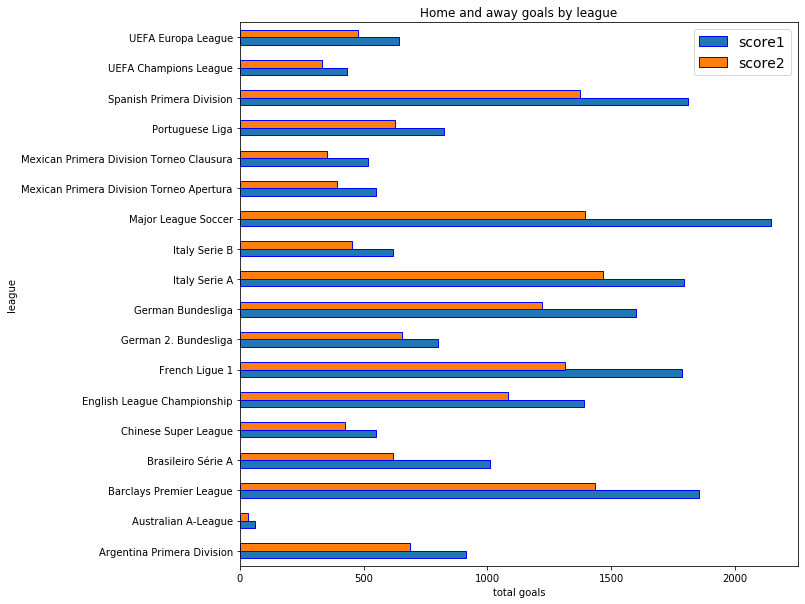

In [36]:
data.groupby("league").agg({"score1":"sum","score2":"sum"}).plot(kind="barh",
                                                            figsize = (10,10),
                                                            edgecolor = "b",
                                                            linewidth =1 )
plt.title("Home and away goals by league")
plt.legend(loc = "best" , prop = {"size" : 14})
plt.xlabel("total goals")
plt.show()

Now we take a look at the top 10 teams with away goals

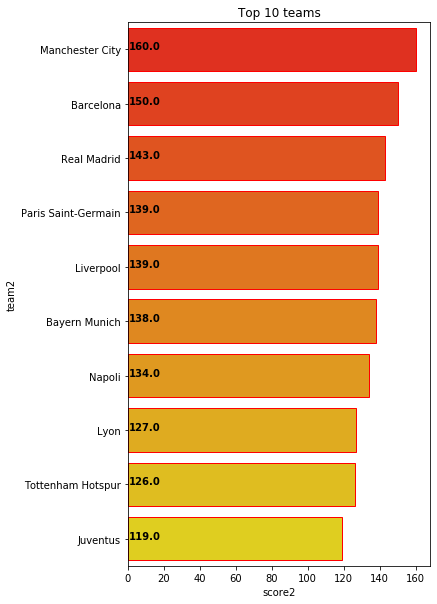

In [37]:
plt.figure(figsize=(13,10))
plt.subplot(122)
ax = sns.barplot(y="team2",x="score2",
                 data=a_t[:10],palette="autumn",
                linewidth = 1,edgecolor = "r"*25)
plt.subplots_adjust(wspace = .4)
plt.title("Top 10 teams")
for i,j in enumerate(a_t["score2"][:10]):
    ax.text(.7,i,j,weight = "bold")

And now we also look at the top 10 teams by their home goals

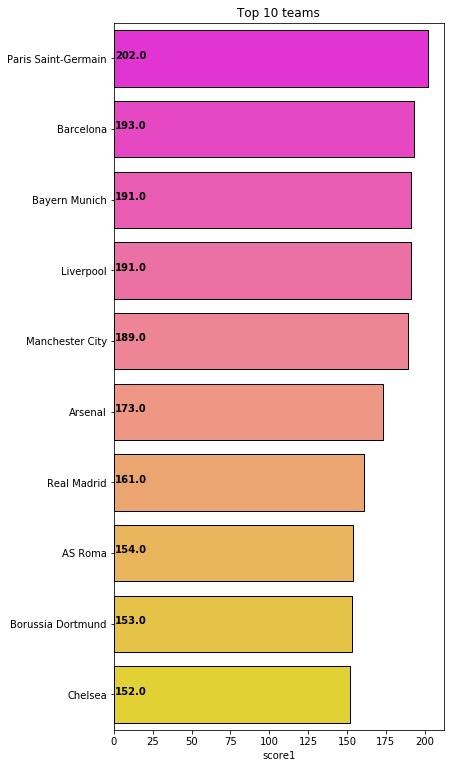

In [38]:

h_t = data.groupby("team1")["score1"].sum().reset_index()
a_t = data.groupby("team2")["score2"].sum().reset_index()
h_t = h_t.sort_values(by="score1",ascending= False)
a_t = a_t.sort_values(by="score2",ascending= False)
plt.figure(figsize=(13,13))
plt.subplot(121)
ax = sns.barplot(y="team1",x="score1",
                 data=h_t[:10],palette="spring",
                 linewidth = 1,edgecolor = "k"*25)
plt.ylabel('')
plt.title("Top 10 teams")
for i,j in enumerate(h_t["score1"][:10]):
    ax.text(.7,i,j,weight = "bold")

Now we take a look at the teams with the highest total goals

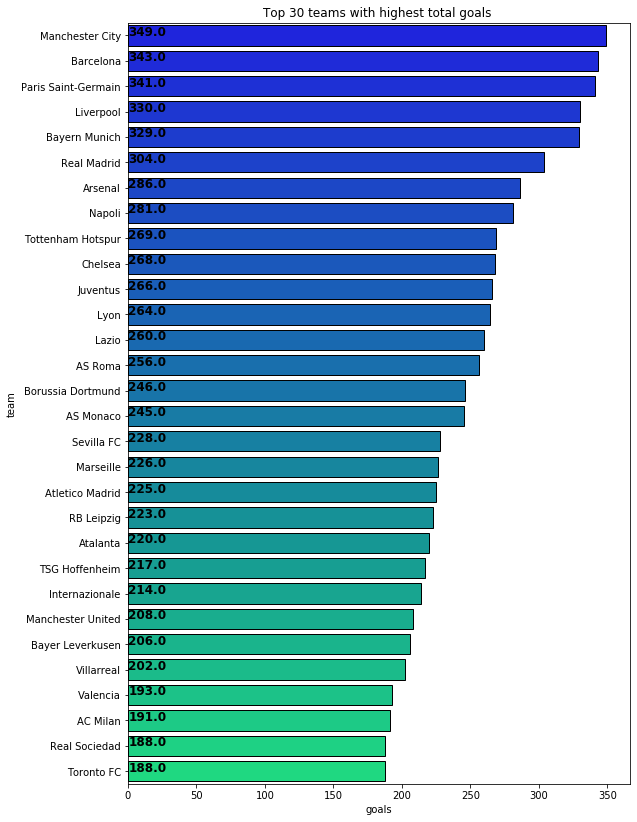

In [39]:
x = h_t
x = x.rename(columns={'team1':"team", 'score1':"goals"})
y = a_t
y = y.rename(columns={'team2':"team", 'score2':"goals"})
goals = pd.concat([x,y])
goals = goals.groupby("team")["goals"].sum().reset_index().sort_values(by = "goals",ascending = False)
plt.figure(figsize=(9,14))
ax = sns.barplot(x="goals",y="team",
                 data=goals[:30],palette="winter",
                linewidth = 1,edgecolor = "k"*30)
for i,j in enumerate(goals["goals"][:30]):
    ax.text(.3,i,j,weight="bold",color = "k",fontsize =12)
plt.title("Top 30 teams with highest total goals ")
plt.show()

Now we design a network layout to depict the teams with the highest number of goals

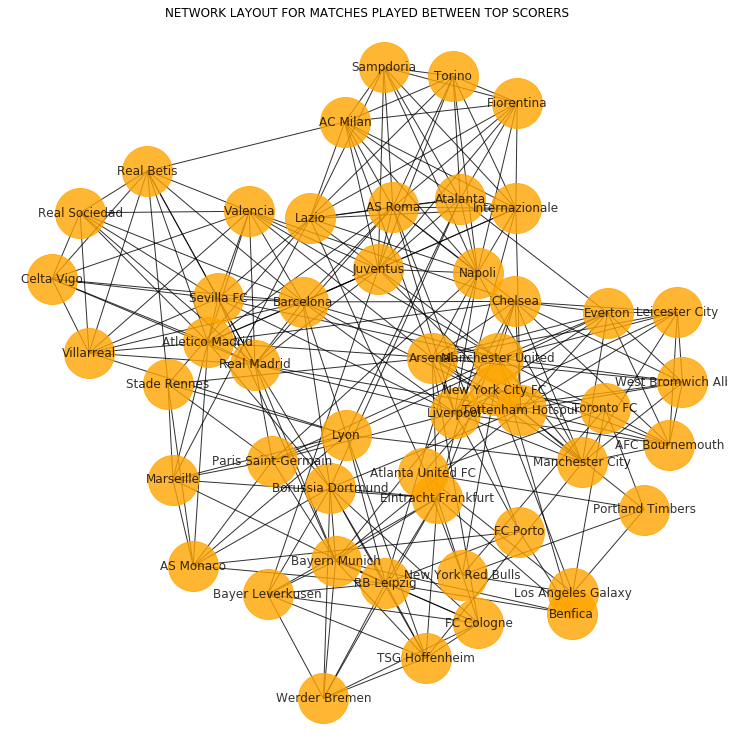

In [41]:
#selecting top 50 teams with highest goals
ts = list(goals["team"][:50])
v =data[["team1","team2"]]
v = v[(v["team1"].isin(ts)) & (v["team2"].isin(ts))]
import networkx as nx
g = nx.from_pandas_edgelist(v,"team1","team2")
fig = plt.figure(figsize=(10,10))
nx.draw_kamada_kawai(g,with_labels =True,node_size =2500,node_color ="Orange",alpha=.8)
plt.title("NETWORK LAYOUT FOR MATCHES PLAYED BETWEEN TOP SCORERS")
fig.set_facecolor("white")

Now we look at the distribution of the home and away goals

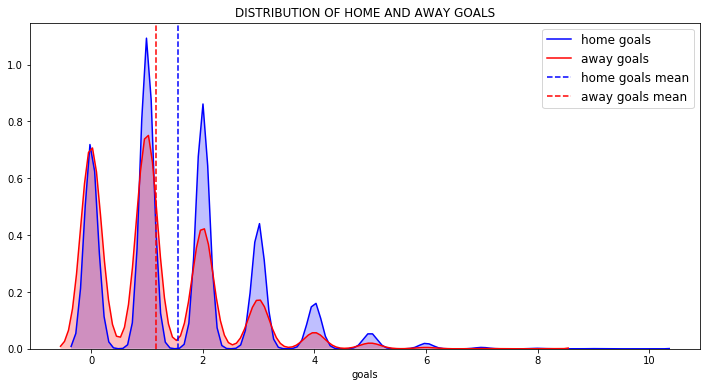

In [42]:
plt.figure(figsize=(12,6))
sns.kdeplot(data["score1"],shade=True,
            color="b",label="home goals")
sns.kdeplot(data["score2"],shade=True,
            color="r",label="away goals")
plt.axvline(data["score1"].mean(),linestyle = "dashed",
            color="b",label="home goals mean")
plt.axvline(data["score2"].mean(),linestyle = "dashed",
            color="r",label="away goals mean")
plt.legend(loc="best",prop = {"size" : 12})
plt.title("DISTRIBUTION OF HOME AND AWAY GOALS")
plt.xlabel("goals")
plt.show()

In the visualization shown below we look at the scores achieved in each league bu each of the teams

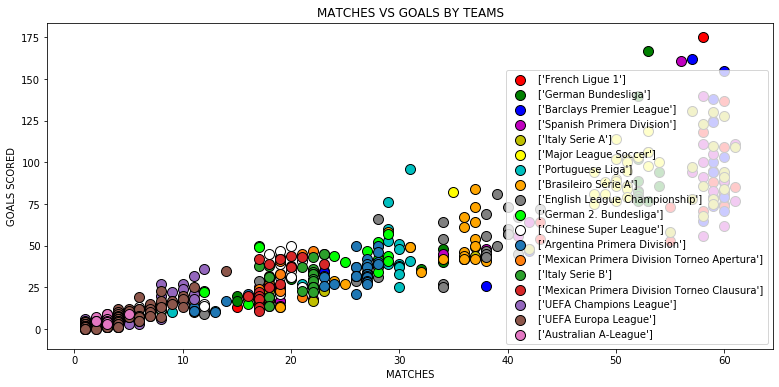

In [43]:

x = data.groupby(["team1","league"]).agg({"league_id":"count","score1":"sum"}).reset_index()
y = data.groupby(["team2","league"]).agg({"league_id":"count","score2":"sum"}).reset_index()
x = x.rename(columns={'team1':"team", 'league_id':"matches", 'score1':"goals"})
y = y.rename(columns={'tean2':"team", 'league_id':"matches", 'score2':"goals"})
xy = pd.concat([x,y], sort=False)
xy = xy.groupby(["team","league"])[["matches","goals"]].sum().reset_index()
xy = xy.sort_values(by="goals",ascending=False)
plt.figure(figsize=(13,6))
c   = ["r","g","b","m","y","yellow","c","orange","grey","lime","white"]
lg = xy["league"].unique()
for i,j,k in itertools.zip_longest(lg,range(len(lg)),c):
    plt.scatter("matches","goals",data=xy[xy["league"] == i],label=[i],s=100,alpha=1,linewidths=1,edgecolors="k",color=k)
    plt.legend(loc="best")
    plt.xlabel("MATCHES")
    plt.ylabel("GOALS SCORED")

plt.title("MATCHES VS GOALS BY TEAMS")
plt.show()

Below, we create a new feature for the winning team

In [44]:
#create new feature for winning team
def label(data):
    if data["score1"] > data["score2"]:
        return data["team1"]
    elif data["score2"] > data["score1"]:
        return data["team2"]
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [45]:
data["win"] = data.apply(lambda data:label(data),axis=1)

In [47]:
#create new feature for outcome of match
def lab(data):
    if data["score1"] > data["score2"]:
        return "HOME TEAM WIN"
    elif data["score2"] > data["score1"]:
        return "AWAY TEAM WIN"
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [48]:
data["outcome_side"] = data.apply(lambda data:lab(data),axis = 1)

In [49]:
#create new feature for losing team
def labe(data):
    if data["score1"] < data["score2"]:
        return data["team1"]
    elif data["score2"] < data["score1"]:
        return data["team2"]
    elif data["score1"] == data["score2"]:
        return "DRAW"

In [50]:
data["lost"] = data.apply(lambda data:labe(data),axis=1)

As we now have a draw variable, we showcase the proportion of home team wins, away wins and draw matches

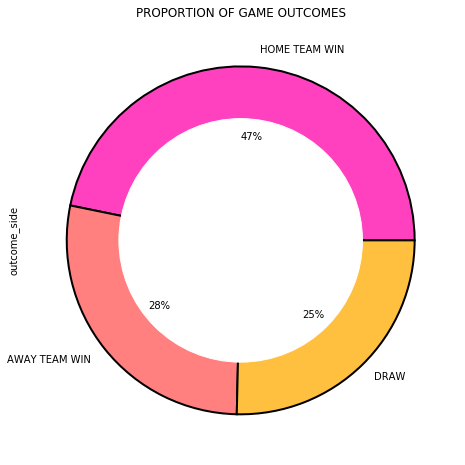

In [51]:

plt.figure(figsize=(8,8))
data["outcome_side"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("spring",3),
                                             wedgeprops = {"linewidth":2,"edgecolor":"black"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GAME OUTCOMES")
plt.show()

Next we take a look at the top winning teams and the top teams that lost

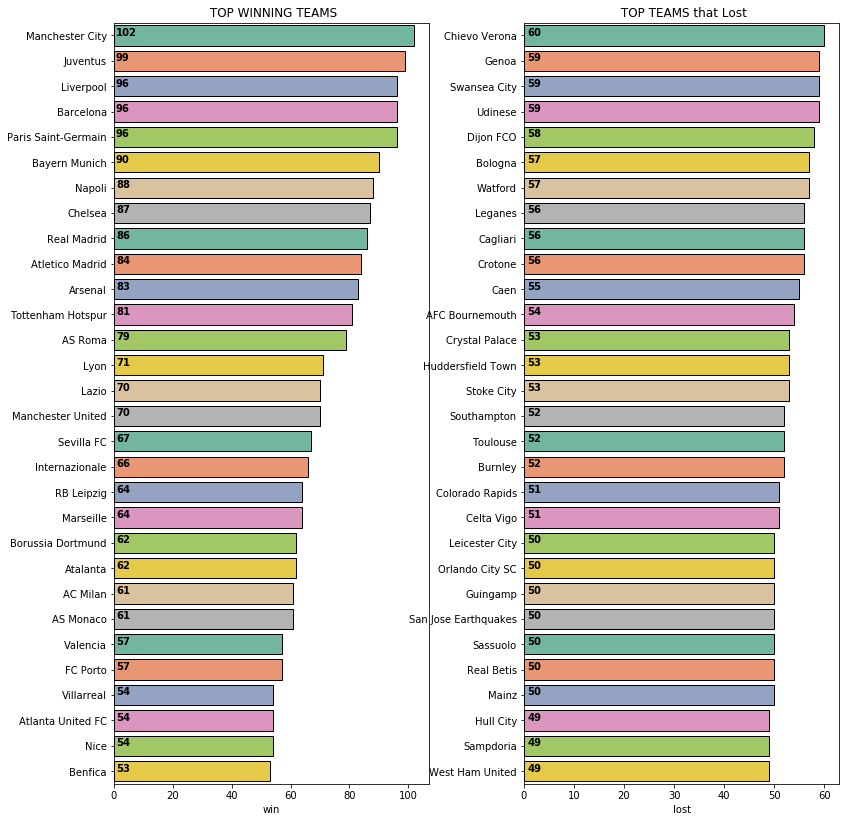

In [52]:
win = data["win"].value_counts()[1:].reset_index()
lost = data["lost"].value_counts()[1:].reset_index()
plt.figure(figsize=(13,14))
plt.subplot(121)
ax = sns.barplot(win["win"][:30],win["index"][:30],
                 palette="Set2",
                linewidth = 1,edgecolor = "k"*30)
plt.title(" TOP WINNING TEAMS")
plt.ylabel("")
for i,j in enumerate(win["win"][:30]):
    ax.text(.7,i,j,color = "black",weight = "bold")
    
plt.subplot(122)
ax = sns.barplot(lost["lost"][:30],lost["index"][:30],
                 palette="Set2",
                linewidth = 1,edgecolor = "k"*30)
plt.title(" TOP TEAMS that Lost")
plt.subplots_adjust(wspace = .3)
plt.ylabel("")
for i,j in enumerate(lost["lost"][:30]):
    ax.text(.7,i,j,color = "black",weight = "bold")

In [53]:
#merge win,draw and lost data of team to matches played
f = xy.merge(win,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
f = f.rename(columns={"outcome":"wins"})
f = f.merge(lost,left_on="team",right_on="index",how="left")
f = f.drop("index",axis =1)
dr = data[data["outcome_side"] == "DRAW"][["team1","team2"]]
l  = dr["team1"].value_counts().reset_index()
v  = dr["team2"].value_counts().reset_index()
l  = l.rename(columns={'index':"team", 'team1':"draw"})
v  = v.rename(columns={'index':"team", 'team2':"draw"})
lv = pd.concat([l,v])
lv = lv.groupby("team")["draw"].sum().reset_index()
f = f.merge(lv,left_on="team",right_on="team",how ="left")

Below, we take a look at the performance of top teams

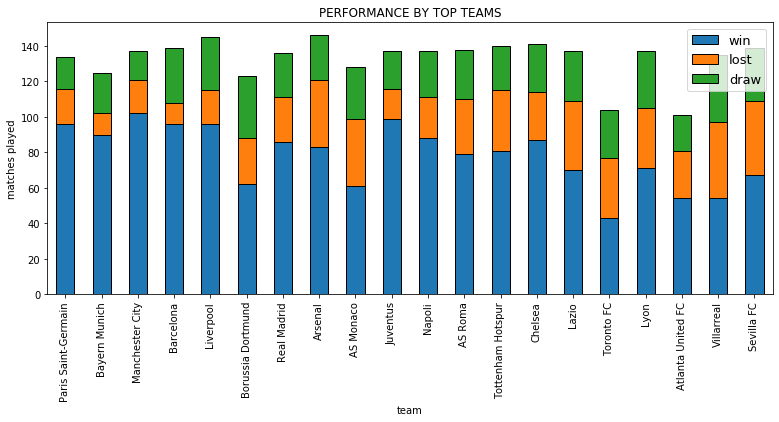

In [54]:
f = f.sort_values(by="goals",ascending=False)
f_new = f.copy()
f_new.index = f_new.team
f_new[["win","lost","draw"]][:20].plot(kind = "bar",figsize=(13,5),
                                   stacked =True,linewidth = 1,
                                   edgecolor = "k"*20
                                  )
plt.legend(loc="best",prop = {"size" : 13})
plt.title("PERFORMANCE BY TOP TEAMS")
plt.ylabel("matches played")
plt.show()

We try to contruct a 3D plot for matches won versus matches where the result was a draw

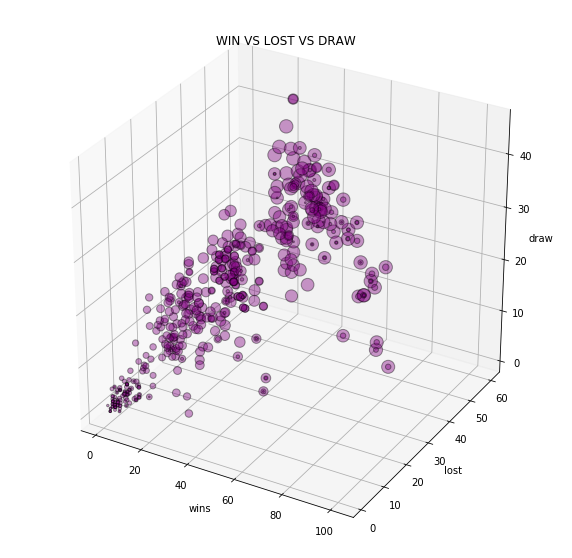

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax  = fig.add_subplot(111,projection ="3d")
ax.scatter(f["win"],f["lost"],f["draw"],s=f["matches"]*3,
           alpha=.4,linewidth =1,edgecolor= "k",c = "purple")
ax.set_xlabel("wins")
ax.set_ylabel("lost")
ax.set_zlabel("draw")
plt.title("WIN VS LOST VS DRAW")
plt.show()

This is the top teams be league

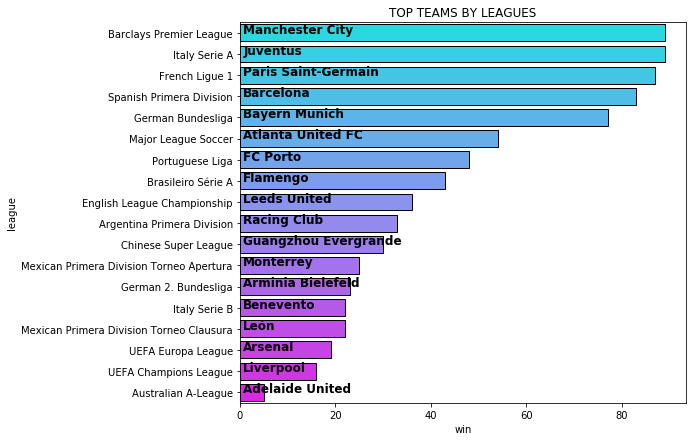

In [56]:

x = pd.DataFrame(data.groupby(["league","win"])["win"].count())
x = x.rename(columns={"win":"team"}).reset_index()
x = x.rename(columns={"win":"team","team":"win"})
x = x.sort_values(by="win",ascending=False)
x = x[x["team"] != "DRAW"]
x = x.drop_duplicates(subset=["league"],keep="first")
plt.figure(figsize=(8,7))
ax =sns.barplot(x["win"],x["league"],palette="cool",
               linewidth = 1 ,edgecolor = "k"*10)
for i,j in enumerate(x["team"]):
    ax.text(.7,i,j,weight = "bold",fontsize = 12)
plt.title("TOP TEAMS BY LEAGUES")
plt.show()

Below we take a look at the matches played in each league versus the total goals scored in that league

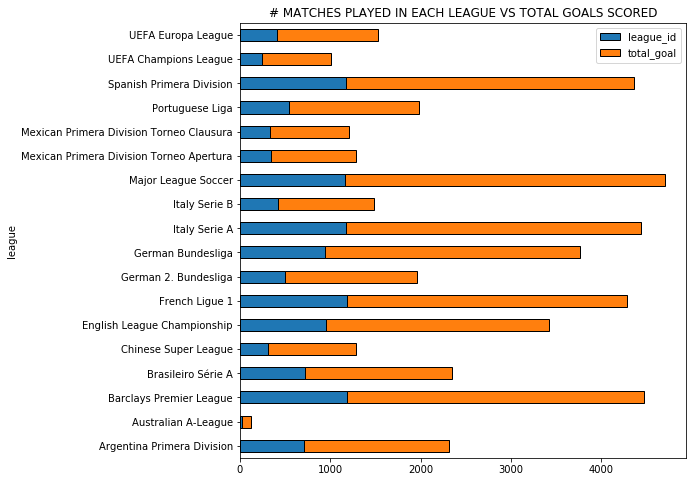

In [57]:
data["total_goal"] = data["score1"]+data["score2"]
data.groupby(["league"]).agg({"league_id":"count","total_goal":"sum"}).plot(kind="barh",
                                                                               stacked =True,
                                                                               figsize=(8,8),
                                                                               linewidth = 1,
                                                                               edgecolor = "k"*data["league"].nunique()
                                                                              )
plt.title("# MATCHES PLAYED IN EACH LEAGUE VS TOTAL GOALS SCORED")
plt.show()

Finally, we take a look at the proportion of matches played in each of the leagues and show them in a chart

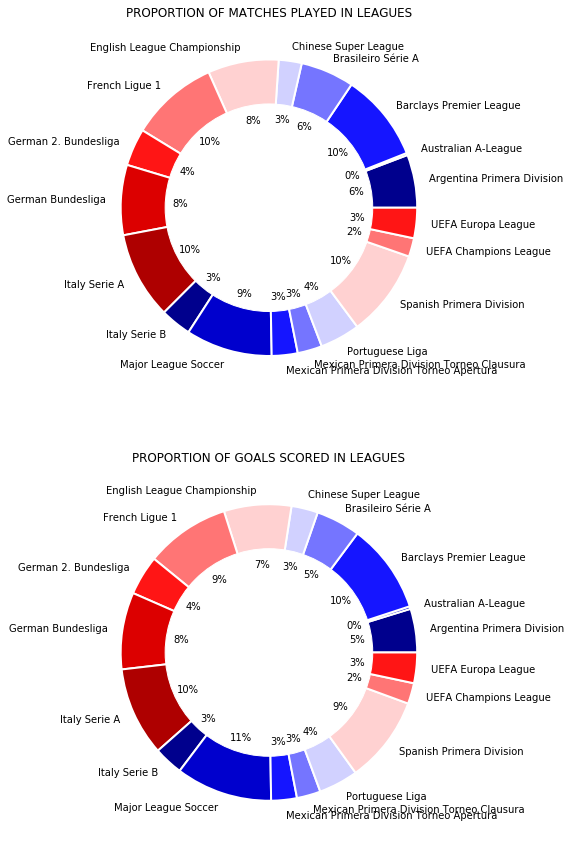

In [58]:
plt.figure(figsize=(7,15))
plt.subplot(211)
agg = data.groupby(["league"]).agg({"league_id":"count","total_goal":"sum"})
agg["league_id"].plot.pie(colors=sns.color_palette("seismic",10),
                             autopct="%1.0f%%",
                             wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF MATCHES PLAYED IN LEAGUES")
plt.subplot(212)
agg["total_goal"].plot.pie(colors=sns.color_palette("seismic",10),
                           autopct="%1.0f%%",
                           wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.ylabel("")
my_circ = plt.Circle((0,0),.7,color ="white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF GOALS SCORED IN LEAGUES")
plt.show()
